# 과제 1
관심있는 주제: 제조데이터 분석(품질 상태 분류)  
이유: 복잡한 데이터를 활용해 실제 산업 현장에서의 문제를 해결한다는 것이 흥미롭게 느껴진다.
https://dacon.io/competitions/official/236055/overview/description

# 과제2
타이타닉 EDA

## 1. 데이터 불러오기

In [ ]:
#  # colab 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글폰트 사용을 위해 설치
# 아래 코드 실행하면 한글 폰트 설치할 필요 없음!
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/비어플/Titanic-Dataset.csv')

In [ ]:
tmp = data.copy()

In [ ]:
# 데이터의 열 확인하기
tmp.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 2. 데이터 살펴보기
-  PassengerId: 승객 ID (각 승객에 대한 고유 식별자)
-  Survived: 생존 여부 (0 = 사망, 1 = 생존)
-  Pclass: 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)
-  Name: 승객 이름
-  Sex: 성별 (male, female)
-  Age: 나이
-  SibSp: 함께 탑승한 형제 또는 배우자 수
-  Parch: 함께 탑승한 부모 또는 자녀 수
-  Ticket: 티켓 번호
-  Fare: 운임 요금
-  Cabin: 객실 번호
-  Embarked: 탑승한 항구 (C = Cherbourg, Q = Queenstown, S = Southampton)


In [ ]:
tmp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 중복 행 없음
tmp.duplicated().sum()

0

In [ ]:
tmp.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 데이터 확인
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 분석의 편의성을 위해 성별 변수를 1 0 으로
tmp['Sex'] = tmp['Sex'].replace({'male': 1, 'female': 0})

<ipython-input-61-3c3a4e177810>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmp['Sex'] = tmp['Sex'].replace({'male': 1, 'female': 0})


## 3. 결측치 살펴보기

<Axes: >

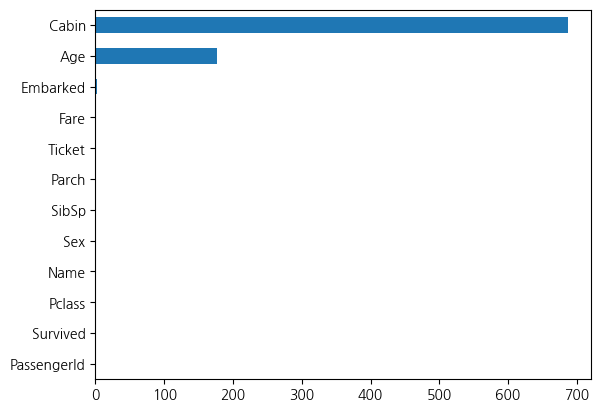

In [ ]:
# 결측치 확인
tmp.isna().sum().sort_values(ascending=True).plot.barh()
# Cabin 대부분 결측치
# Age 대략 200개 결측치
# Embarked 2개 결측치

### 3.1 Age 결측치 채우기
동일한 특성을 가진 행들의 평균값으로 채우기

In [ ]:
print(tmp['Age'].isna().sum()) # 원래 Age 결측치 수
group_mean = tmp.groupby(['Survived','Pclass','Sex'])['Age'].mean().reset_index() # 동일한 특성을 가진 행들의 Age평균 구하기
tmp.loc[tmp['Age'].isna(),['Survived', 'Pclass', 'Sex']]
tmptmp = pd.merge(tmp.loc[tmp['Age'].isna(),['Survived', 'Pclass', 'Sex']], group_mean, on=['Survived', 'Pclass', 'Sex'], how='left') # Age가 결측치인 데이터에 Age평균을 결합하기
tmp.loc[tmp['Age'].isna(),'Age'] = tmptmp['Age'].values
print(tmp['Age'].isna().sum()) # Age 결측치수가 0임을 확인

177
0


### 3.2 Embarked 결측치 채우기
최반값으로 채우기

In [ ]:
print(tmp['Embarked'].isna().sum())
tmp['Embarked'].fillna(tmp['Embarked'].mode()[0], inplace=True)
print(tmp['Embarked'].isna().sum())

2
0


<ipython-input-64-ca41812badb4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tmp['Embarked'].fillna(tmp['Embarked'].mode()[0], inplace=True)


### 3.3 Cabin 열은 결측치가 너무 많으므로 일단 보류하기


## 4. 변수별로 특징 확인해보기
- 시각화
- 결측치 보완 ex(삭제, 평균으로 대체 or 최빈값으로 대체, 수기로 채우기)
- 전처리 시에는 기존 데이터 프레임을 유지하고 분석하는 것이 좋다.


### 4.1 첫번째로 변수들의 분포를 살펴보자

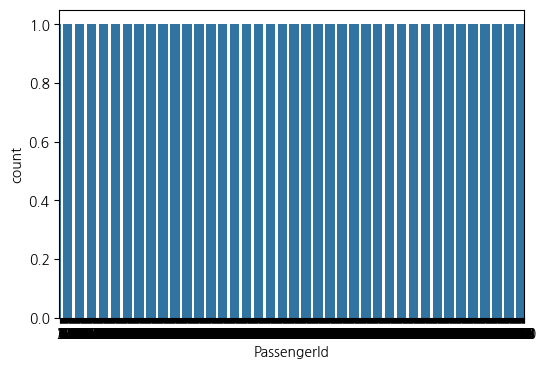

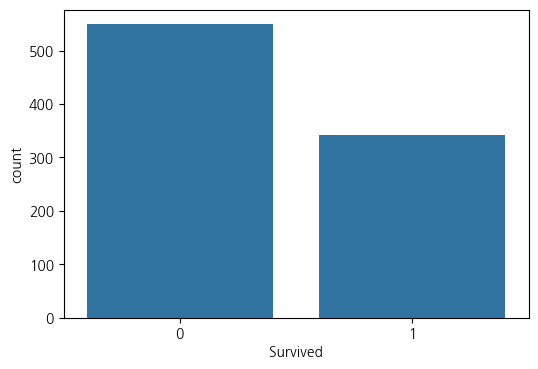

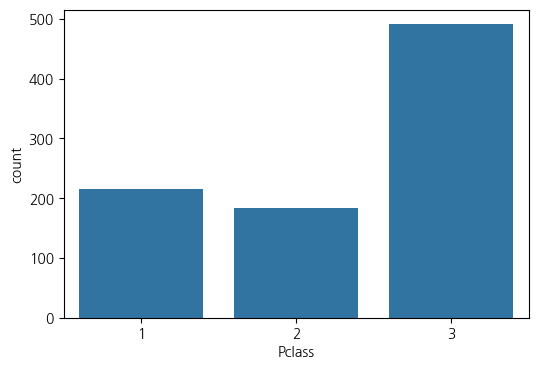

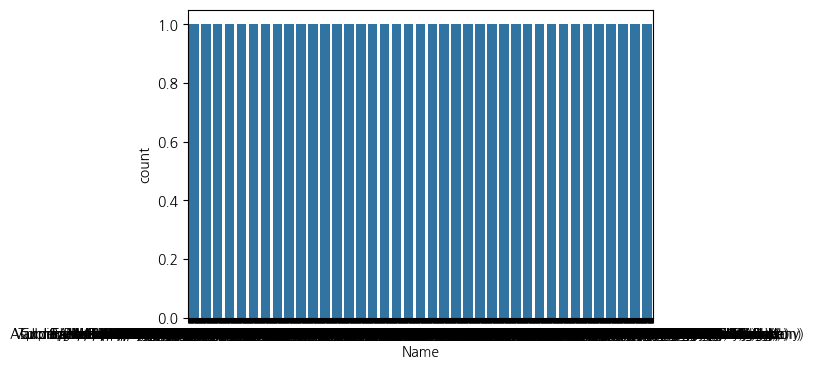

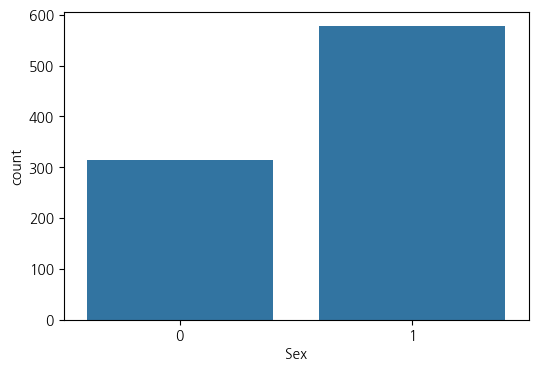

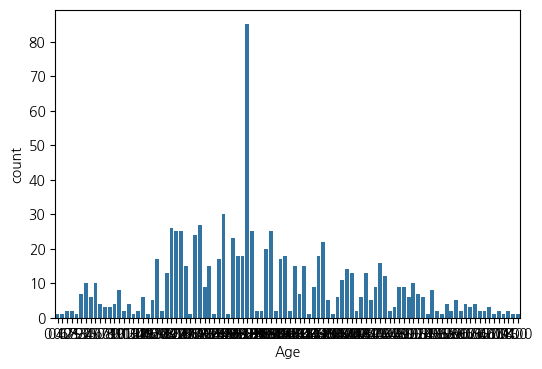

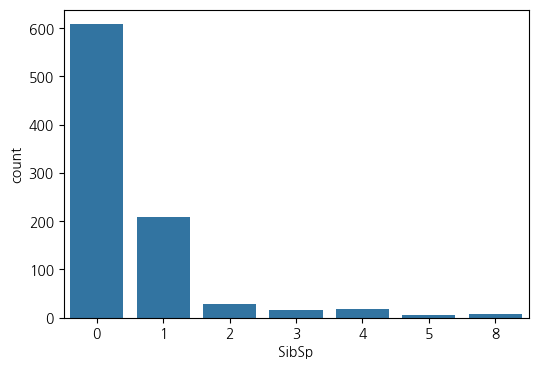

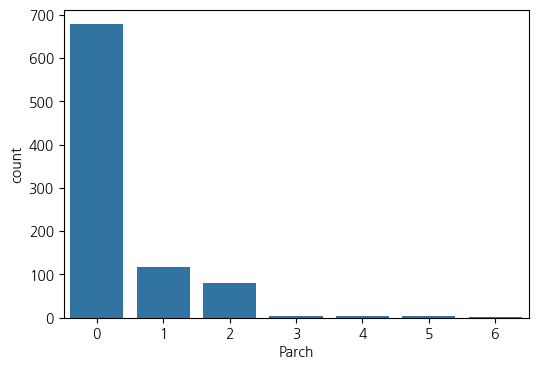

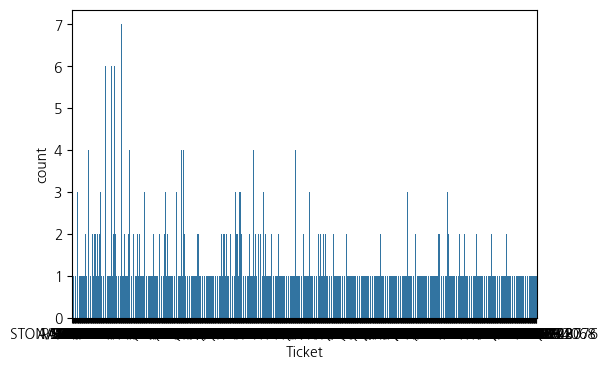

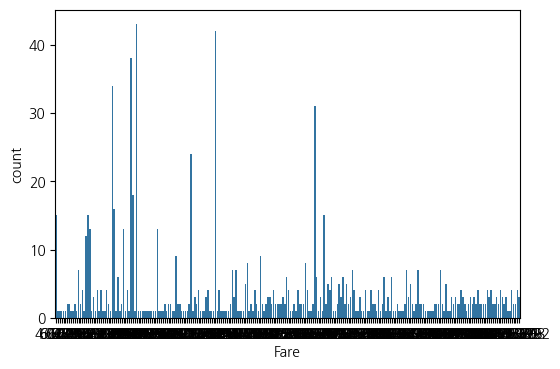

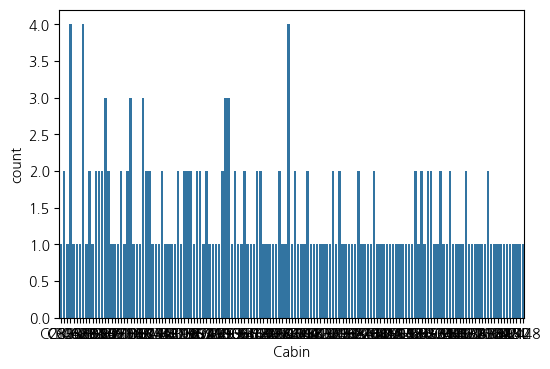

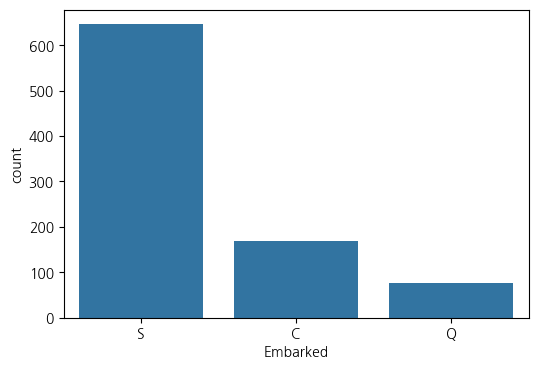

In [ ]:
col_name = tmp.columns

# 각 열마다 히스토그램 출력
for i in range(len(col_name)):
    plt.figure(figsize=(6, 4))  # 그래프 크기 설정
    sns.countplot(data=tmp, x=col_name[i])
    plt.show()

### 4.2 변수들간의 관계를 살펴보자

#### 4.2.1 생존여부와 나이사이의 어떤 관계가 보일까?

<Axes: xlabel='Survived', ylabel='Age'>

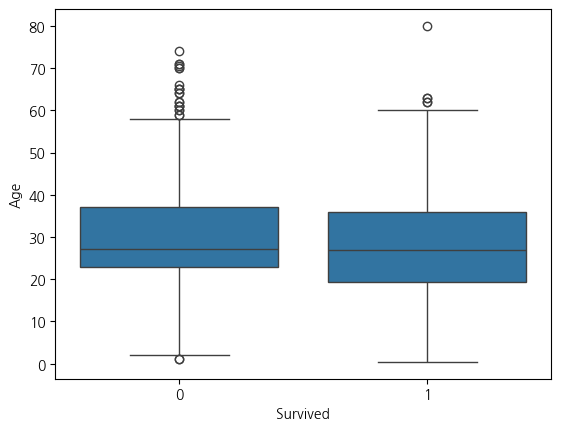

In [ ]:
sns.boxplot(data=tmp,x='Survived', y='Age')
# 생존한 그룹이 평균적으로 더 어리지만 큰 차이는 없어 보인다.
# 나이를 그냥 단순히 분석하는 것 보다는 그룹으로 나누어 분석하는것이 조금 더 특성을 잘 반영할 수 있을 것 같다.

<Axes: xlabel='Age_group', ylabel='Survived'>

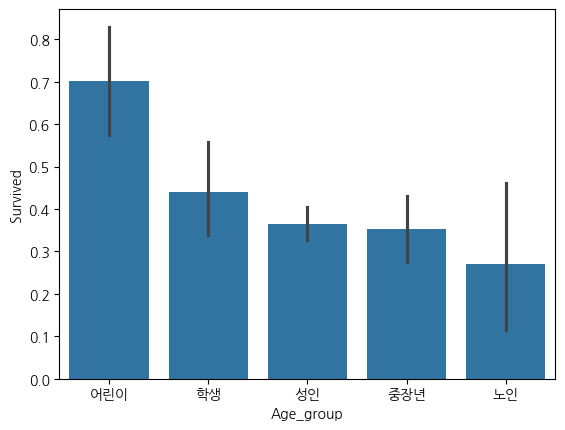

In [ ]:
age_bins = [0,7,18,40,60,100]
age_labels = ['어린이', '학생', '성인','중장년','노인']  # 신체적 특성을 기준으로 구분하였다
tmp['Age_group'] = pd.cut(tmp['Age'], bins=age_bins, labels=age_labels, right=False)
sns.barplot(data = tmp, x='Age_group', y='Survived')
# 어린이의 경우 생존률이 높았고 노인의 경우 생존률이 낮았다
# 나머지 3개 그룹은 비슷하다

<Axes: xlabel='Age_group', ylabel='Survived'>

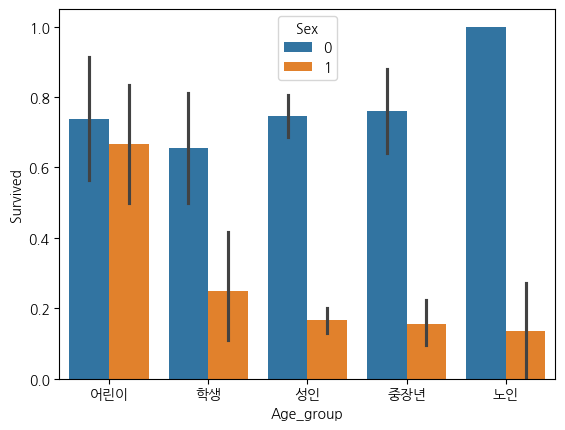

In [ ]:
# 나이별 성별 생존률을 확인해보자
sns.barplot(data = tmp, x='Age_group', y='Survived', hue ='Sex')
# 여자의 경우에는 오히려 나이가 많은 그룹에서 생존률이 조금 더 높은 경향을 보인다
# 남자의 경우에는 나이가 적은 그룹이 월등히 생존률이 높고 나머지는 매우 낮다

#### 4.2.2 생존여부와 티켓클래스 사이의 어떤관계가 보일까?

<Axes: xlabel='Pclass', ylabel='Survived'>

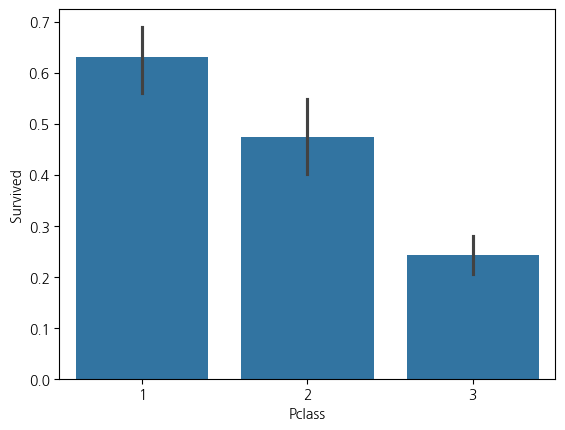

In [ ]:
sns.barplot(data=tmp,x='Pclass', y='Survived')
# 1등급석은 약 60프로 생존
# 2등급석은 약 50프로 생존
# 3등급석은 약 20프로 생존
# 좋은 자리(1등급석) 일수록 생존율이 높았다

<Axes: xlabel='Pclass', ylabel='Survived'>

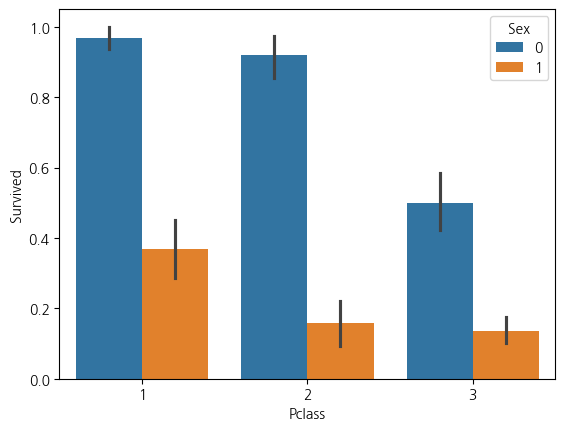

In [ ]:
sns.barplot(data=tmp,x='Pclass', y='Survived', hue='Sex')
# 남녀 둘 다의 경우에서 높은 등급의 자리에서 생존률이 높다.

#### 4.2.3 생존여부와 성별간의 어떤 관계가 보일까?

<Axes: xlabel='Sex', ylabel='Survived'>

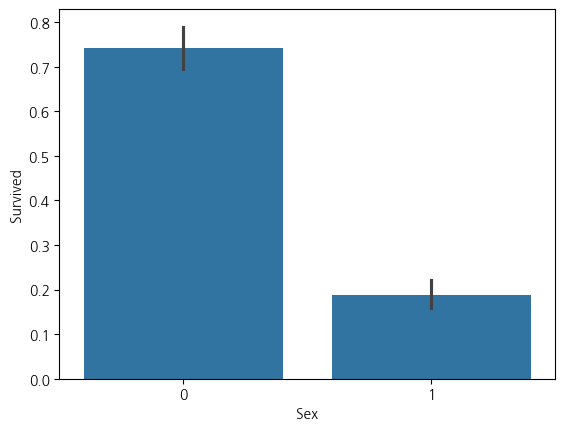

In [ ]:
sns.barplot(data=tmp,x='Sex', y='Survived')
# 남자는 약 20프로 생존
# 여자는 약 75프로 생존
# 여자가 남자에 비해 생존률이 매우 높다

#### 4.2.4 동승 가족 수와 생존여부의 관계 확인

<Axes: xlabel='Fnum', ylabel='Survived'>

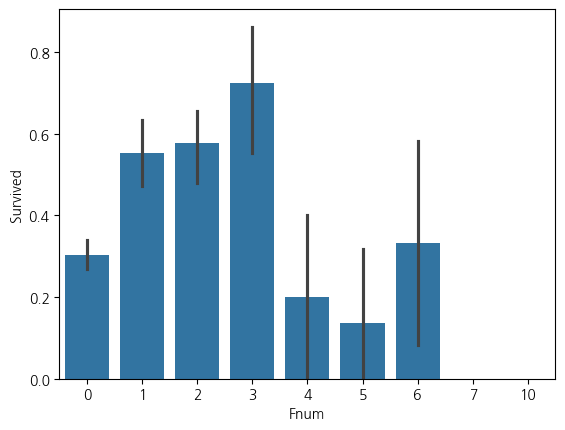

In [ ]:
# 먼저 파생변수 만들기
tmp['Fnum'] = tmp['SibSp'] + tmp['Parch']

sns.barplot(data=tmp, x='Fnum', y='Survived')
# 동승가족수 차이에 따라 생존률이 크게 차이 나지만 무슨의미가 있는지는 모르겠다
# 다른 변수로 그룹을 나누어 확인해보자

<Axes: xlabel='Fnum', ylabel='Survived'>

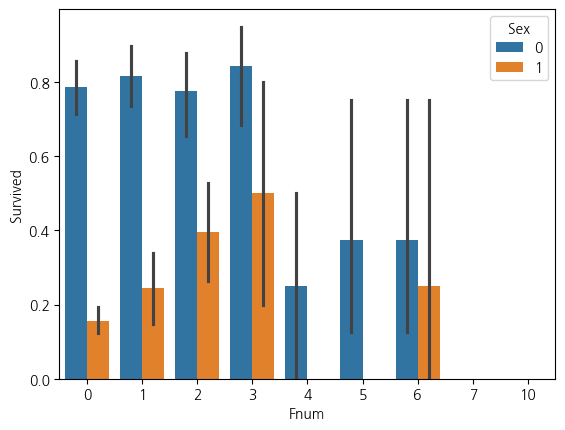

In [ ]:
sns.barplot(data=tmp, x='Fnum', y='Survived', hue='Sex')
# 큰 의미는 없어보인다

<Axes: xlabel='Fnum', ylabel='Survived'>

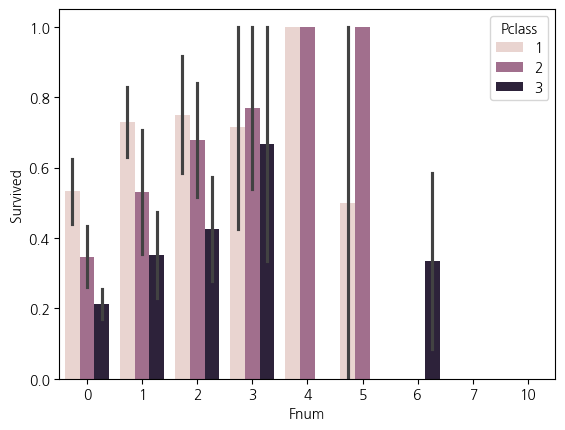

In [ ]:
sns.barplot(data=tmp, x='Fnum', y='Survived', hue='Pclass')
# 큰 의미는 없어보인다

#### 4.2.5 Fare(요금) 변수에 대해서
1. Pclass와 관계가 있을 것이다.
2. 어디서 탔는지에 따라 요금이 다를 것이다.

<Axes: xlabel='Pclass', ylabel='Fare'>

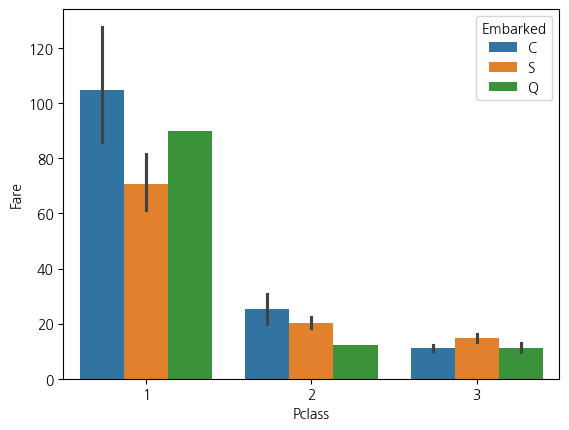

In [ ]:
sns.barplot(data=tmp, x='Pclass', y='Fare')
# 당연하게도 높은 등급의 티켓이 더 비싸다

<Axes: xlabel='Embarked', ylabel='Fare'>

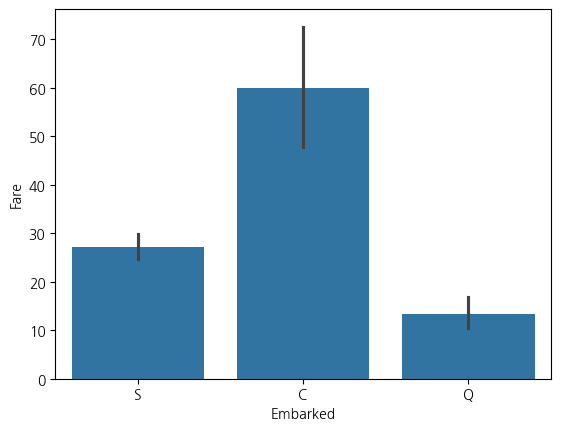

In [ ]:
sns.barplot(data = tmp, x='Embarked', y='Fare')
# C > S > Q 순으로 요금이 비싸다
# 아마도 거리별로 다르게 측정됐을 것이다